In [6]:
# Importing Libraries 
import numpy as np                                          
import pandas as pd                                        
import matplotlib.pyplot as plt                             
import seaborn as sns                                      
%matplotlib inline
sns.set()

from subprocess import check_output

In [14]:


olympic = pd.read_csv("C:/Users/DELL/Downloads/Summer-Olympic-medals-1976-to-2008.csv", encoding='latin1')



In [12]:
olympic.shape

(15433, 11)

In [5]:
olympic.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [16]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [7]:
olympic.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Dropping duplicates
olympic.drop_duplicates(inplace=True)

In [48]:
print(olympic.isnull().sum())

city            1
year            1
sport           1
discipline      1
event           1
athlete         1
gender          1
country_code    1
country         0
event_gender    1
medal           1
dtype: int64


In [50]:
df_cleaned = olympic.dropna()

In [52]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          15315 non-null  object 
 1   year          15315 non-null  float64
 2   sport         15315 non-null  object 
 3   discipline    15315 non-null  object 
 4   event         15315 non-null  object 
 5   athlete       15315 non-null  object 
 6   gender        15315 non-null  object 
 7   country_code  15315 non-null  object 
 8   country       15315 non-null  object 
 9   event_gender  15315 non-null  object 
 10  medal         15315 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


In [78]:
 medals_by_country =df_cleaned.groupby('country')['medal'].count().sort_values(ascending=False)

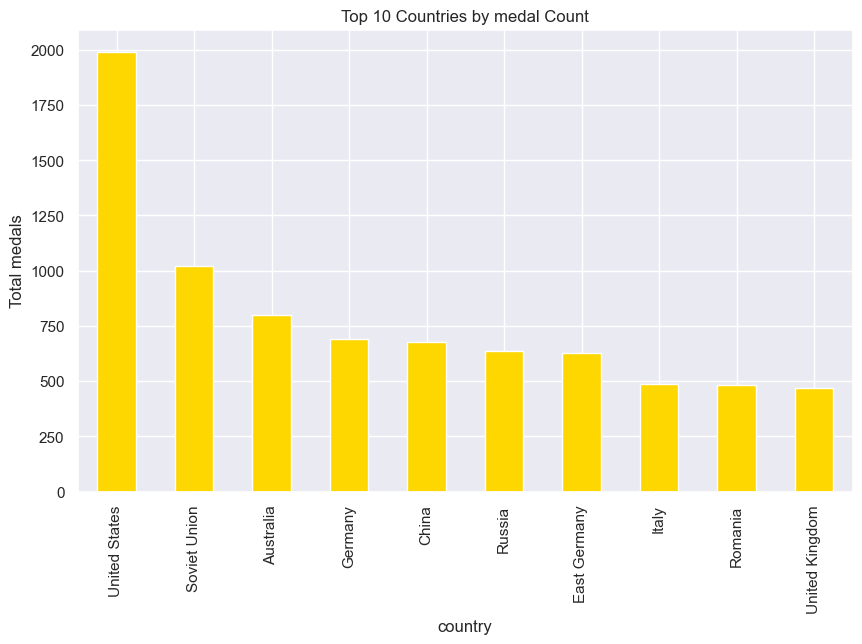

In [80]:
plt.figure(figsize=(10, 6))
medals_by_country.head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Countries by medal Count")
plt.xlabel("country")
plt.ylabel("Total medals")
plt.show()

In [84]:
 # Grouping by Year and counting the medals won
 medals_over_years = df_cleaned.groupby('year')['medal'].count()


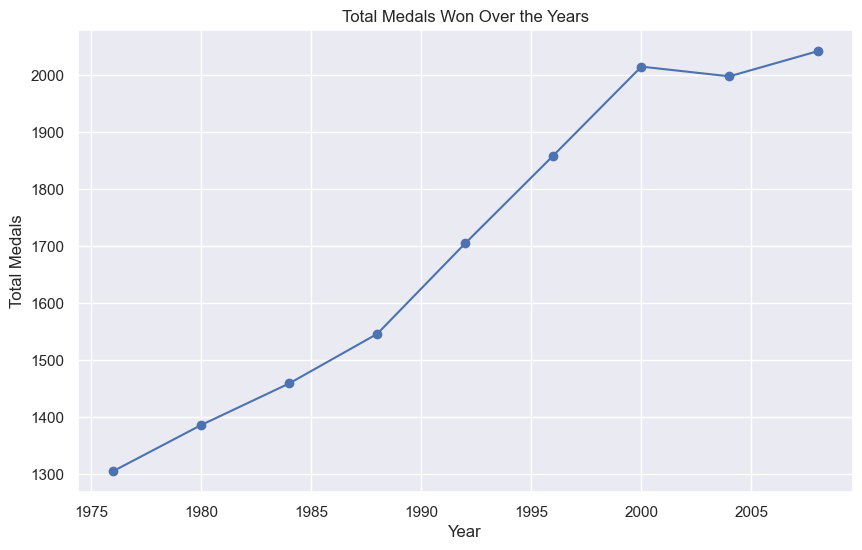

In [86]:
 # Plotting the trend of medals won over the years
 plt.figure(figsize=(10, 6))
 plt.plot(medals_over_years.index,
 medals_over_years.values,
marker='o', linestyle='-', color='b')
 plt.title("Total Medals Won Over the Years")
 plt.xlabel("Year")
 plt.ylabel("Total Medals")
 plt.grid(True)
 plt.show()

In [92]:
# Gender distribution in events
gender_distribution = df_cleaned['gender'].value_counts()

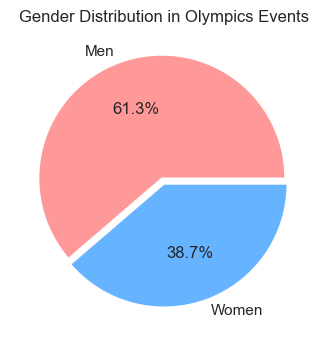

In [96]:
# Plotting gender distribution
plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='pie',
autopct='%1.1f%%',
colors=['#ff9999','#66b3ff'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

In [102]:
 # Group by Athlete and count the number of medals
 athlete_medal_count = df_cleaned.groupby('athlete')['medal'].count().sort_values(ascending=False)

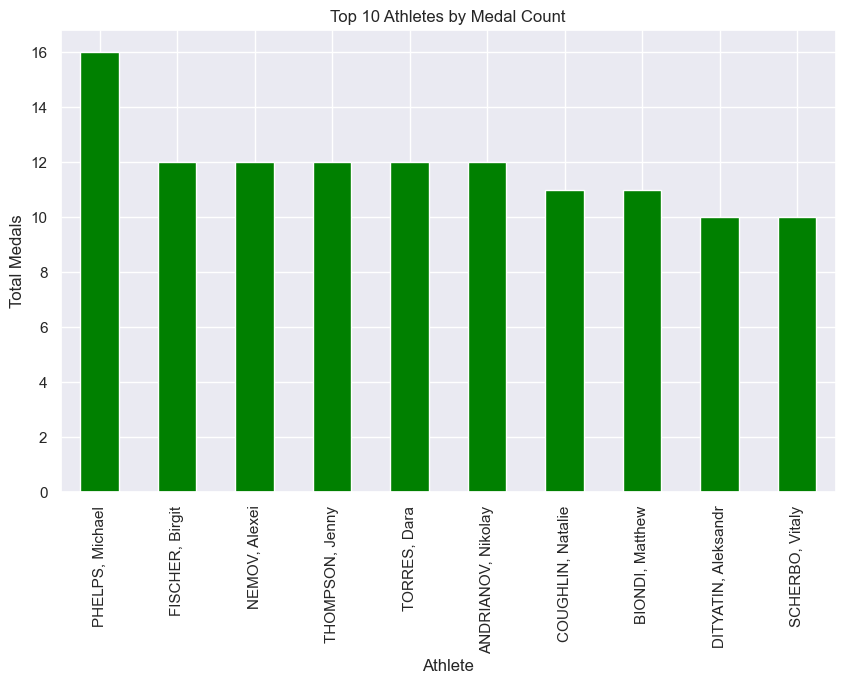

In [108]:
# Plotting the top 10 athletes with most medals
plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='green')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13904\2182584652.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([tuple(olympic.year)],bins=25)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

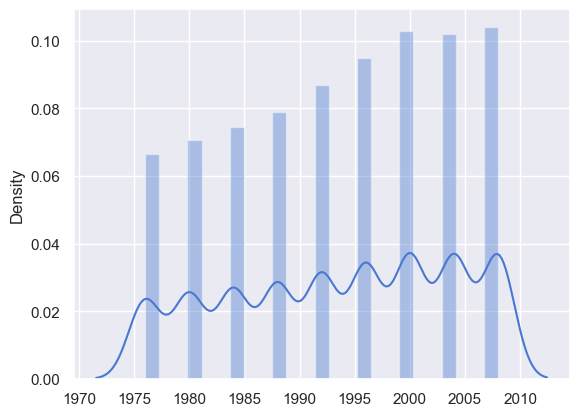

In [32]:
# Trends over years in summer olympics 
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(olympic.year)],bins=25)

Text(0.5, 1.0, 'Count plot for medals in summer olympics')

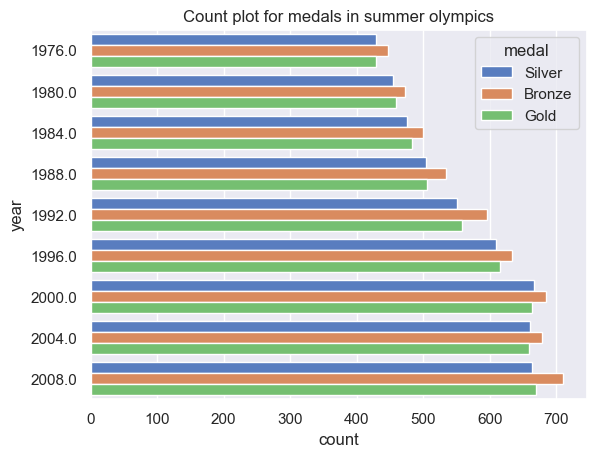

In [34]:
#Most Medals in Summer Olympics
data = olympic.groupby(['discipline','year'])['medal'].value_counts()
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y='year', hue='medal', data=olympic).set_title('Count plot for medals in summer olympics')


In [36]:
# Discipline with maximum medals
olympic.groupby(['discipline','medal'])['medal'].value_counts().sort_values(ascending=False)

discipline  medal 
Athletics   Silver    512
            Bronze    507
            Gold      504
Swimming    Gold      493
            Silver    474
                     ... 
Trampoline  Bronze      6
            Gold        6
BMX         Silver      2
            Gold        2
            Bronze      2
Name: count, Length: 123, dtype: int64

In [28]:
# Event with maximum medals
olympic.groupby(['event','medal'])['medal'].count().sort_values(ascending=False)

event                     medal 
Football                  Bronze    509
                          Gold      503
Hockey                    Gold      485
Football                  Silver    485
Hockey                    Silver    477
                          Bronze    459
Team Competition          Gold      403
                          Silver    372
                          Bronze    372
Basketball                Gold      342
                          Silver    336
                          Bronze    334
Handball                  Silver    329
Water Polo                Gold      325
Handball                  Bronze    323
                          Gold      321
Water Polo                Bronze    318
                          Silver    315
Volleyball                Gold      312
Team                      Gold      312
Volleyball                Silver    311
                          Bronze    311
Eight With Coxswain (8+)  Gold      306
Team                      Silver    306
Eight W

In [30]:
# oldest olympic sport
olympic.groupby(['year','sport'])['medal'].count().head(10)

year  sport        
1896  Aquatics         11
      Athletics        37
      Cycling          16
      Fencing           8
      Gymnastics       45
      Shooting         15
      Tennis           10
      Weightlifting     6
      Wrestling         3
1900  Aquatics         61
Name: medal, dtype: int64

In [31]:
# recent olympic sport addition
olympic.groupby(['year','sport'])['medal'].count().tail(10)

year  sport        
2012  Rowing           144
      Sailing           48
      Shooting          45
      Table Tennis      24
      Taekwondo         32
      Tennis            24
      Triathlon          6
      Volleyball        84
      Weightlifting     45
      Wrestling         72
Name: medal, dtype: int64

##  How many uniques events do we have thus far, in Summer Olympics?

In [38]:
#How many events do we have thus far, in Olympics
print("There are {} unique sports thus far, in Olympics". format(olympic["sport"].nunique()))

There are 28 unique sports thus far, in Olympics


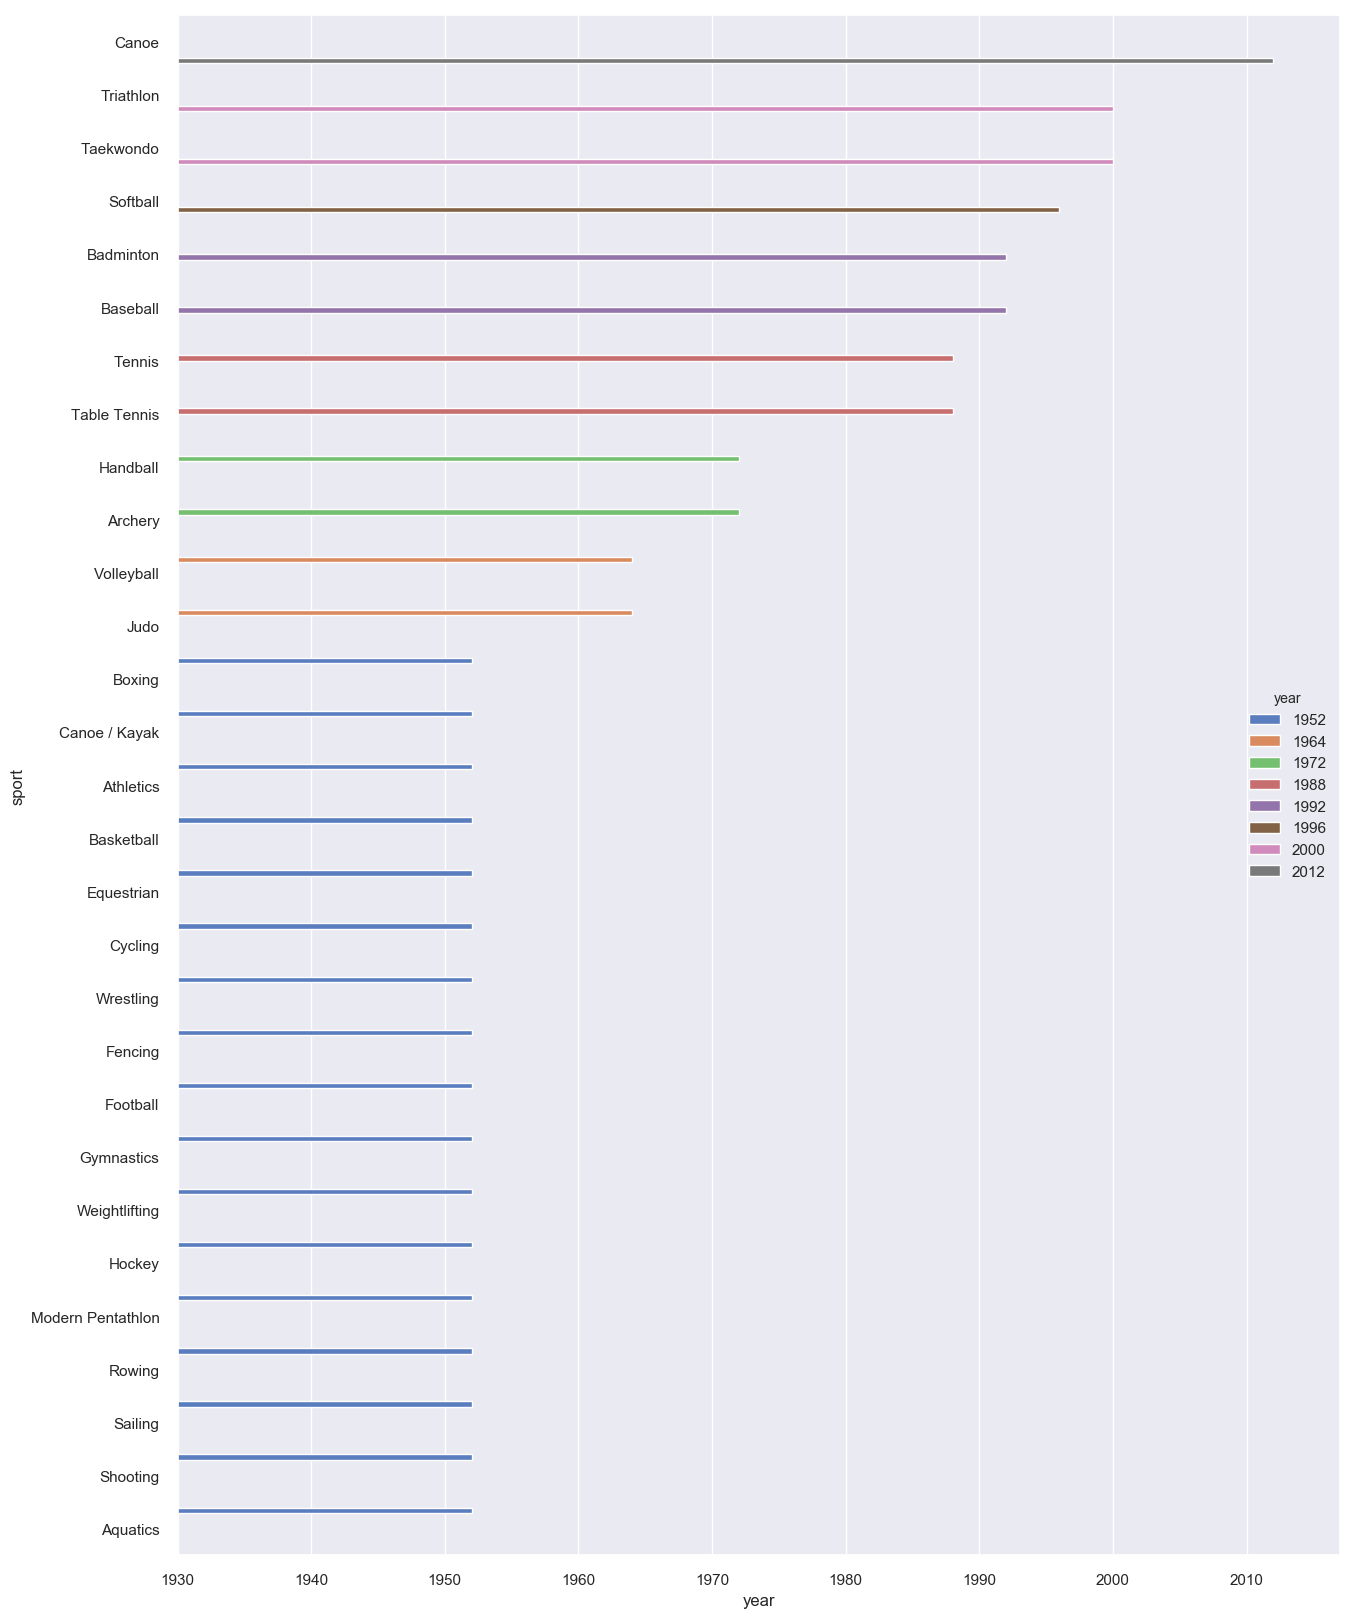

In [35]:
df_sports = olympic[olympic["year"]>=1950].groupby("sport")["year"].min().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,20))
plt.xlim(1930,2017)
sns.barplot(x = "year", y = "sport", hue="year", data=df_sports)
plt.show()

Do not confuse length of bar as length of the sport. The length reflects the year the event was part of Olympics

Canoe were recently included into Olympics (2012)

##  Which country won the most Gold medals, in each of the Olympics?

In [41]:
#Which country won the most Gold medals, in each of the Olympics?
df_sports  = olympic[olympic["medal"]=="Gold"].groupby(["year","country"], as_index=False)["id"].count().rename(
    columns={"id":"total"})
df_sports.iloc[df_sports.groupby(["year"])["total"].idxmax()]

,year,country,total
5,1896,GER,26
18,1900,GBR,48
32,1904,USA,146
39,1908,GBR,144
61,1912,SWE,86
77,1920,USA,110
95,1924,USA,110
123,1928,USA,43
143,1932,USA,78
152,1936,GER,88


#  Top 10 Women Athletes - Gold Medals

In [79]:
womenMedalWinners=womenInOlympics.groupby(['athlete'])['medal'].value_counts().sort_values(ascending=False)
womenMedalWinners.head(10)

athlete               medal
LATYNINA, Larisa      Gold     9
THOMPSON, Jenny       Gold     8
FISCHER, Birgit       Gold     8
CASLAVSKA, Vera       Gold     7
VAN DYKEN, Amy        Gold     6
OTTO, Kristin         Gold     6
VEZZALI, Valentina    Gold     6
WERTH, Isabell        Gold     5
ANDRUNACHE, Georgeta  Gold     5
LIPA, Elisabeta       Gold     5
Name: medal, dtype: int64

Text(0.5, 1.0, 'Medals per Women Athlete')

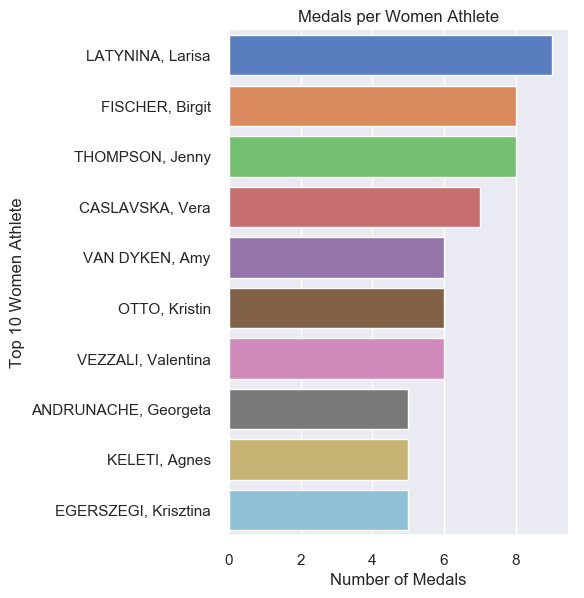

In [85]:
totalWomenGoldMedalAthlete = olympic[(olympic['medal'] == 'Gold') & (olympic['gender'] == 'Women')]['athlete'].value_counts().reset_index(name='athlete').head(10)
g = sns.catplot(y="index", x="athlete", data=totalWomenGoldMedalAthlete,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Number of Medals")
g.set_ylabels("Top 10 Women Athlete")
plt.title('Medals per Women Athlete')

##  Top 10 Women Athletes - Total Medals 

In [45]:
womenInOlympicsTotalMedal = olympic[(olympic['gender'] == 'Women')]
womenInOlympicsTotalMedal.groupby(['athlete'])['medal'].value_counts().sort_values(ascending=False).head(10)

athlete                    medal 
LATYNINA, Larisa           Gold      9
FISCHER, Birgit            Gold      8
THOMPSON, Jenny            Gold      8
CASLAVSKA, Vera            Gold      7
VAN DYKEN, Amy             Gold      6
BABASHOFF, Shirley Farber  Silver    6
VEZZALI, Valentina         Gold      6
OTTEY-PAGE, Merlene        Bronze    6
OTTO, Kristin              Gold      6
VAN ALMSICK, Franziska     Bronze    6
Name: medal, dtype: int64

#  Top 10 Men Athletes - Gold Medals

In [46]:
menInOlympics = olympic[(olympic['gender'] == 'Men')&(olympic['medal'] == 'Gold')]
menInOlympics.groupby(['athlete'])['medal'].value_counts().sort_values(ascending=False).head(10)

athlete                     medal
PHELPS, Michael             Gold     18
SPITZ, Mark                 Gold      9
NURMI, Paavo                Gold      9
LEWIS, Carl                 Gold      9
BIONDI, Matthew             Gold      8
KATO, Sawao                 Gold      8
EWRY, Ray                   Gold      8
SHAKHLIN, Boris             Gold      7
CHUKARIN, Viktor Ivanovich  Gold      7
GEREVICH, Aladar            Gold      7
Name: medal, dtype: int64

Text(0.5, 1.0, 'Medals per Men Athlete')

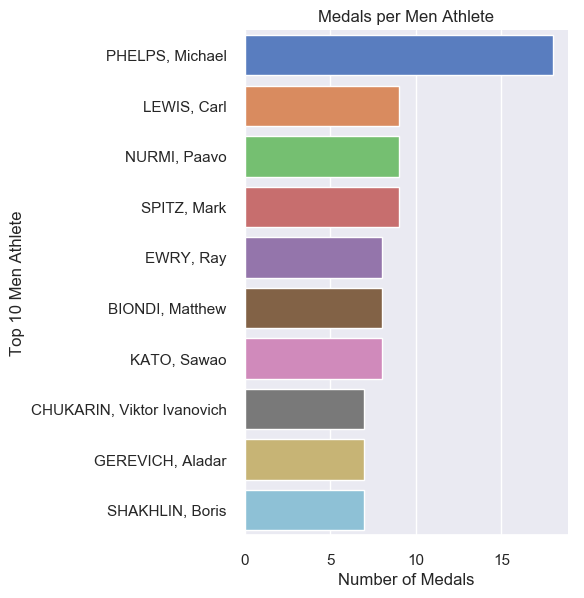

In [87]:
totalMenGoldMedalAthlete = olympic[(olympic['medal'] == 'Gold') & (olympic['gender'] == 'Men')]['athlete'].value_counts().reset_index(name='athlete').head(10)
g = sns.catplot(y="index", x="athlete", data=totalMenGoldMedalAthlete,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Number of Medals")
g.set_ylabels("Top 10 Men Athlete")
plt.title('Medals per Men Athlete')

##  Top 10 Men Athletes - Total Medals

In [47]:
menInOlympicsTotalMedal = olympic[(olympic['gender'] == 'Men')]
menInOlympicsTotalMedal.groupby(['athlete'])['medal'].value_counts().sort_values(ascending=False).head(10)

athlete                     medal
PHELPS, Michael             Gold     18
SPITZ, Mark                 Gold      9
NURMI, Paavo                Gold      9
LEWIS, Carl                 Gold      9
BIONDI, Matthew             Gold      8
EWRY, Ray                   Gold      8
KATO, Sawao                 Gold      8
CHUKARIN, Viktor Ivanovich  Gold      7
ANDRIANOV, Nikolay          Gold      7
GEREVICH, Aladar            Gold      7
Name: medal, dtype: int64

##  Top 5 countries to win most Gold medals across all seasons collectively

In [48]:
olympic[(olympic['medal'] == 'Gold')]['country'].value_counts().reset_index(name='medal').head(5)

,index,medal
0,USA,2237
1,URS,838
2,GBR,546
3,ITA,476
4,GER,452


Text(0.5, 1.0, 'Medals per Country')

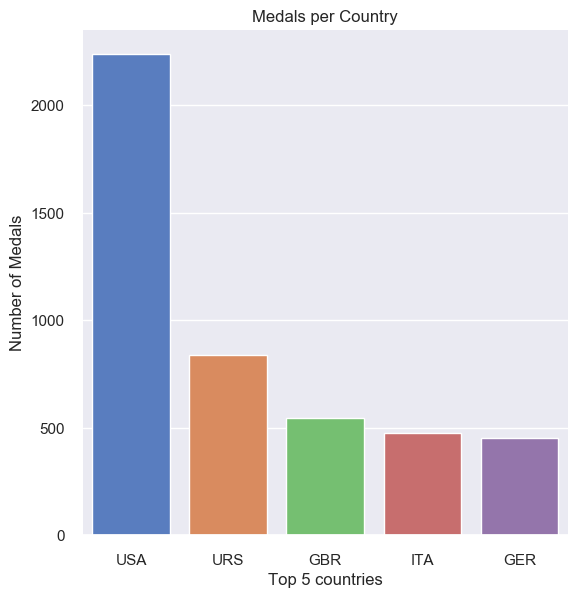

In [49]:
totalGoldMedals = olympic[(olympic['medal'] == 'Gold')]['country'].value_counts().reset_index(name='medal').head(5)
g = sns.catplot(x="index", y="medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

The __USA__ seems to win most Gold medals

In [56]:
# Variation of male/female athletes over time
MenOverTime = olympic[(olympic.gender == 'Men')]
WomenOverTime = olympic[(olympic.gender == 'Women')]

##  Disciplines with the greatest number of Gold Medals

Text(0.5, 1.0, 'Variation of Male Athletes over time')

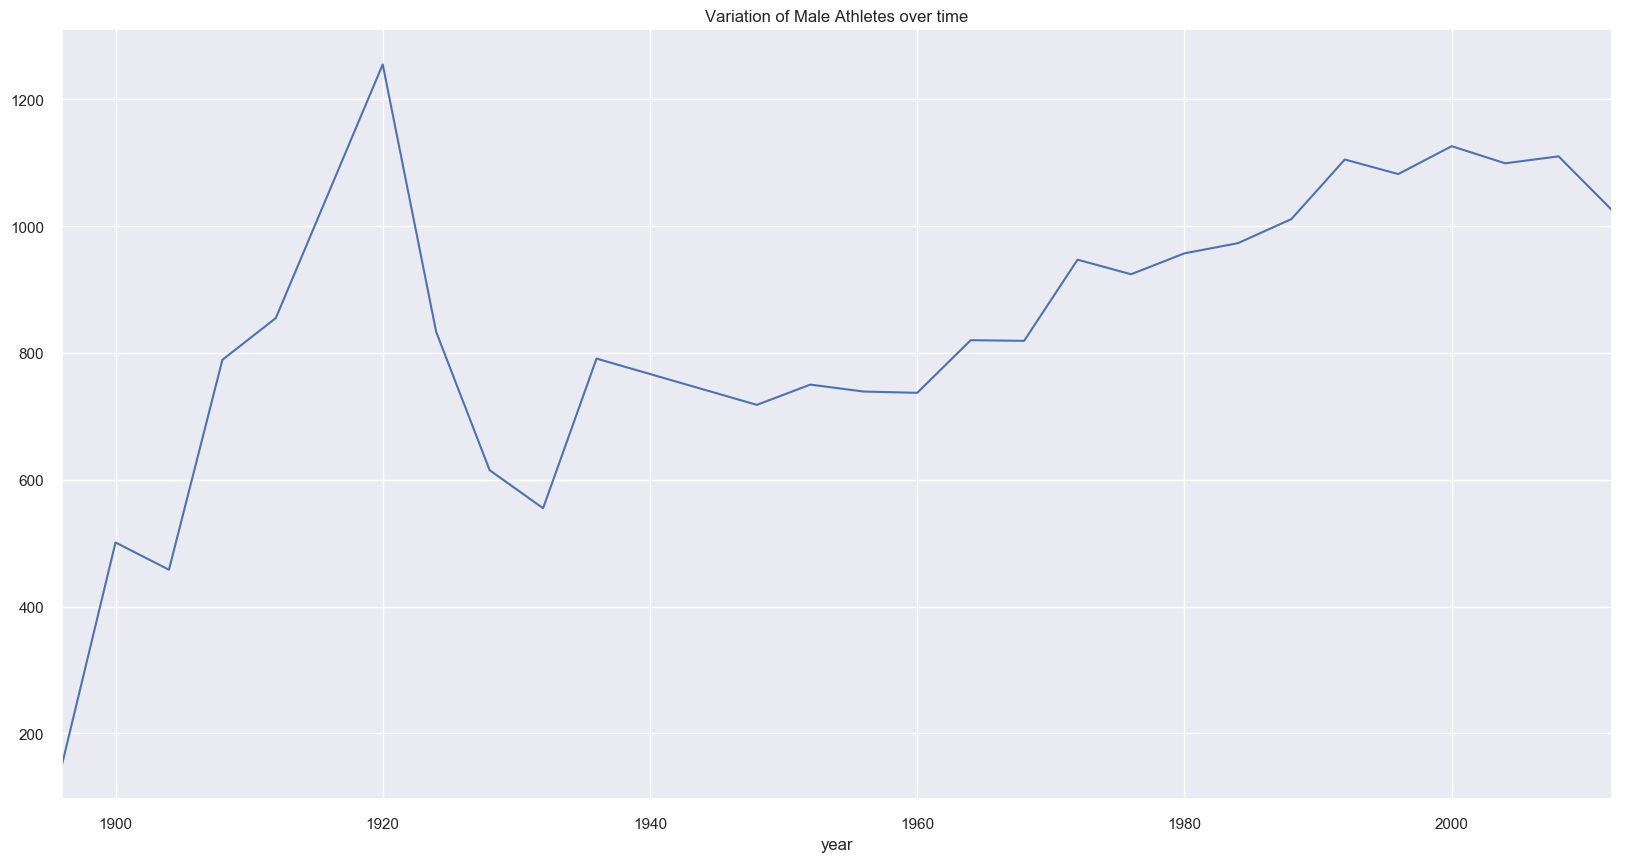

In [57]:
# Variation of Male Athletes over time
part = MenOverTime.groupby('year')['gender'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'Men'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

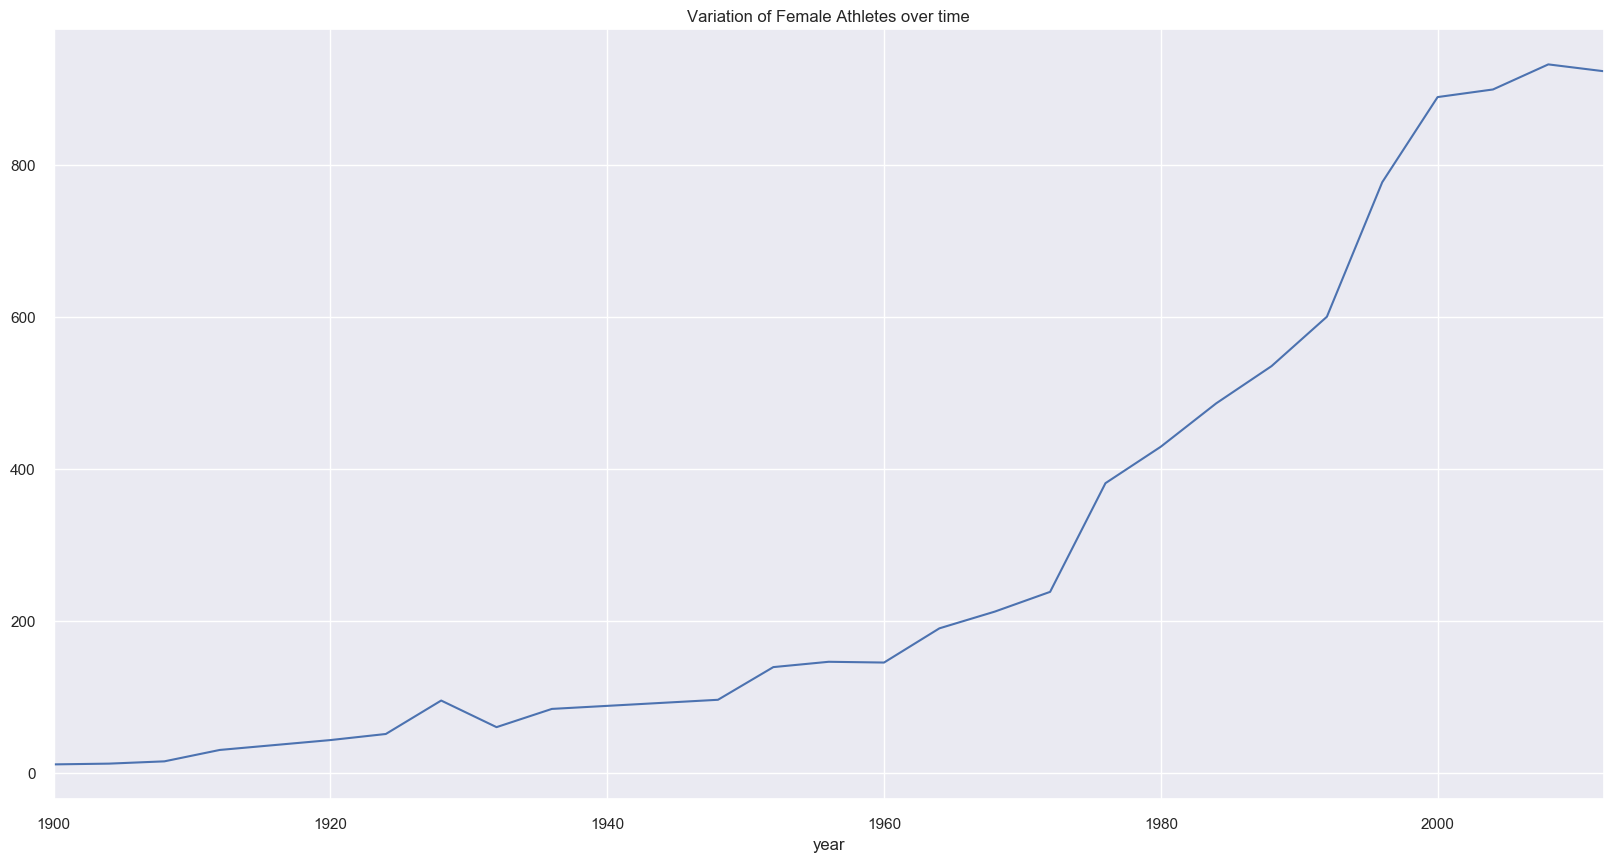

In [58]:
# Variation of Female Athletes over time
part = WomenOverTime.groupby('year')['gender'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'Women'].plot()
plt.title('Variation of Female Athletes over time')

### Immediate Observations

#### for women:

1. We have a steep increase in the population;
2. Rapid growth post 1970.
3. For now, the growth is more or less constant.

#### for men:
1. The growth for men seems less strong:
2. After the 2000 we can see a relevant decrease in the number of male athletes at the summer games;
3. The growth has decreased recently.

##  How many athlete participated in each sport in Summer Olympics?

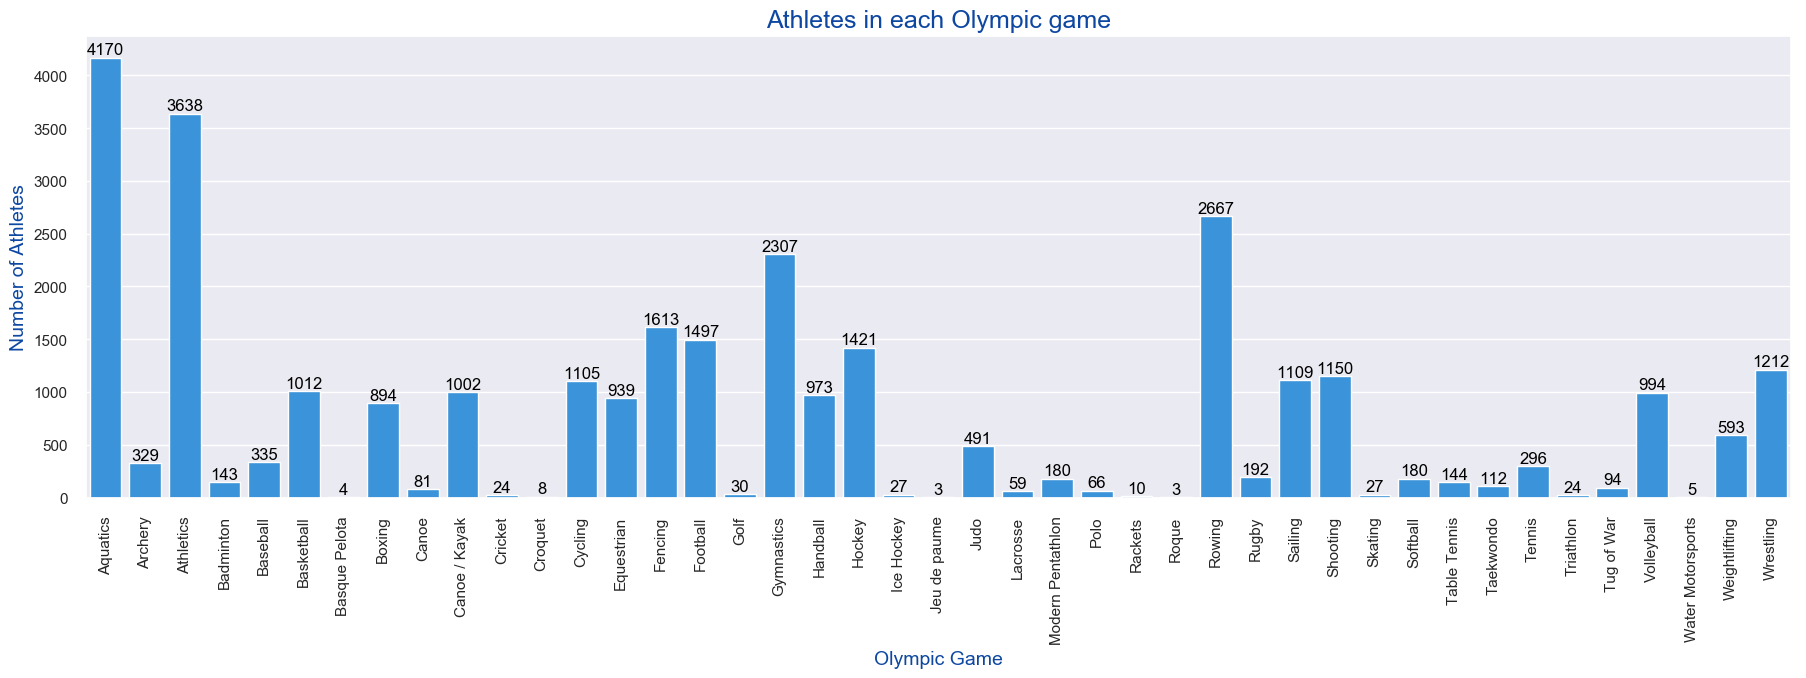

In [60]:
# Athletes in each olympic games
games_athletes = olympic.pivot_table(olympic, index=['sport'], aggfunc=lambda x: len(x.unique())).reset_index()[['sport','id']]
fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='sport', y='id', data=games_athletes, ax=ax, color="#2196F3")
a.set_xticklabels(labels=games_athletes['sport'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes in each Olympic game', size=18, color="#0D47A1")

plt.show()

##  Top 10 countries with total medals in Summer Olympic games

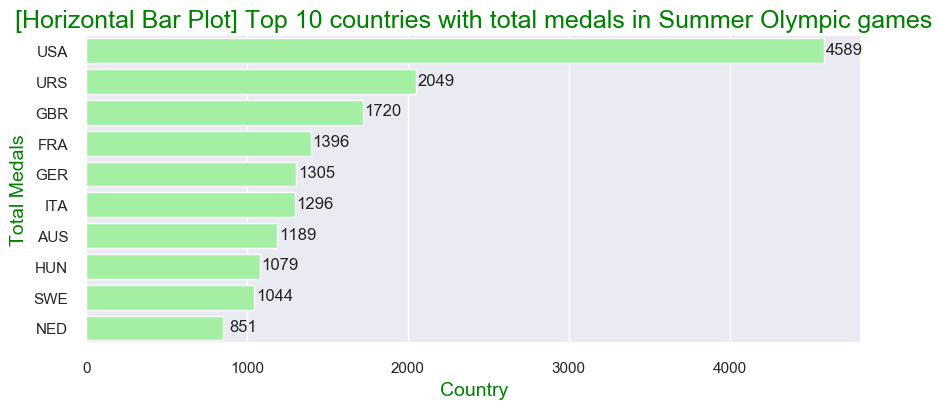

In [66]:
t10_summer =olympic[(olympic['medal']!='No Medal')].groupby('country').count().reset_index()[['country','medal']].sort_values('medal', ascending=False).head(10)
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x="medal", y="country", data=t10_summer, label="Country", color="palegreen")

for p in ax.patches:
    ax.text(p.get_width() + 125,
            p.get_y() + (p.get_height()/2) + .1,
            '{:1.0f}'.format(p.get_width()),
            ha="center")

ax.set_xlabel('Country', size=14, color="green")
ax.set_ylabel('Total Medals', size=14, color="green")
ax.set_title('[Horizontal Bar Plot] Top 10 countries with total medals in Summer Olympic games', size=18, color="green")
plt.show()